2021-11-30 ~ 2023-12-01 까지 2년치 매일 30건씩 

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lib.stats.stats as st
import lib.annotation.Result_Prep as rp
import config.config as conf


In [3]:
path = f'./result/'
file_list = os.listdir(path)

In [4]:
r_p = rp.Result_Prep()

In [5]:
ver_list = sorted([y for y in [x for x in file_list if x.isdigit()] if (int(y)>=11110000)])

In [6]:
print(ver_list)

['11110000']


In [7]:
tot_calc = pd.DataFrame()
for listid in ver_list:
    df = r_p.make_one_file(listid)
    if isinstance(df, pd.core.frame.DataFrame):
        df = r_p.pp_df(df, 5)
        df = r_p.calc_rate(df)
        tot_calc = pd.concat([tot_calc, df], axis = 0)

    

In [8]:
tot_calc.head()

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,11110000,2021-11-30,-365,0,4,20,20.0
1,11110000,2021-11-30,-365,1,15,20,75.0
2,11110000,2021-11-30,-365,2,1,20,5.0
3,11110000,2021-12-01,-364,0,6,20,30.0
4,11110000,2021-12-01,-364,1,13,20,65.0


In [9]:
df_date = r_p.pp_date(tot_calc)

In [10]:
df_date.head()

,creationdate
0,2021-11-30
1,2021-12-01
2,2021-12-02
3,2021-12-03
4,2021-12-04


In [11]:
tot_calc.head()

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,11110000,2021-11-30,-365,0,4,20,20.0
1,11110000,2021-11-30,-365,1,15,20,75.0
2,11110000,2021-11-30,-365,2,1,20,5.0
3,11110000,2021-12-01,-364,0,6,20,30.0
4,11110000,2021-12-01,-364,1,13,20,65.0


In [12]:
tot_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           2145 non-null   int64         
 1   creationdate  2145 non-null   datetime64[ns]
 2   rel_days      2145 non-null   int64         
 3   o_result      2145 non-null   object        
 4   r_cnt         2145 non-null   int64         
 5   tot_cnt       2145 non-null   int64         
 6   rate          2145 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 134.1+ KB


In [13]:
tot_calc[tot_calc['creationdate'] =='2022-05-15']

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
476,11110000,2022-05-15,-199,0,7,18,38.888889
477,11110000,2022-05-15,-199,1,9,18,50.000000
478,11110000,2022-05-15,-199,2,2,18,11.111111


In [14]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [15]:
m_chk_cnt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 2142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           724 non-null    int64         
 1   creationdate  724 non-null    datetime64[ns]
 2   rel_days      724 non-null    int64         
 3   o_result      724 non-null    object        
 4   r_cnt         724 non-null    int64         
 5   tot_cnt       724 non-null    int64         
 6   rate          724 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 45.2+ KB


In [16]:
m_chk_cnt_0 = pd.merge(df_date, m_chk_cnt_0[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_1 = pd.merge(df_date, m_chk_cnt_1[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_2 = pd.merge(df_date, m_chk_cnt_2[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')

In [17]:
m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'] = 0
m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'] = 0
m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'] = 0

In [18]:
m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)

0     -365 days
1     -364 days
2     -363 days
3     -362 days
4     -361 days
         ...   
729    364 days
730    365 days
731    366 days
732    367 days
733    368 days
Name: creationdate, Length: 734, dtype: timedelta64[ns]

In [19]:
m_chk_cnt_0['rel_days'] = np.where(m_chk_cnt_0['rel_days'].isna(), (m_chk_cnt_0['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_0['rel_days'])
m_chk_cnt_1['rel_days'] = np.where(m_chk_cnt_1['rel_days'].isna(), (m_chk_cnt_1['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_1['rel_days'])    
m_chk_cnt_2['rel_days'] = np.where(m_chk_cnt_2['rel_days'].isna(), (m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_2['rel_days'])



In [20]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [21]:
m_chk_cnt_0.head()
# m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,creationdate,rel_days,o_result,rate
0,2021-11-30,-365.0,0,20.000000
1,2021-12-01,-364.0,0,30.000000
2,2021-12-02,-363.0,0,28.571429
3,2021-12-03,-362.0,0,18.181818
4,2021-12-04,-361.0,0,31.578947


In [22]:
# major_xticks = df_date['creationdate'].apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

In [23]:
major_xticks = df_date['creationdate'].to_list()
# .apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

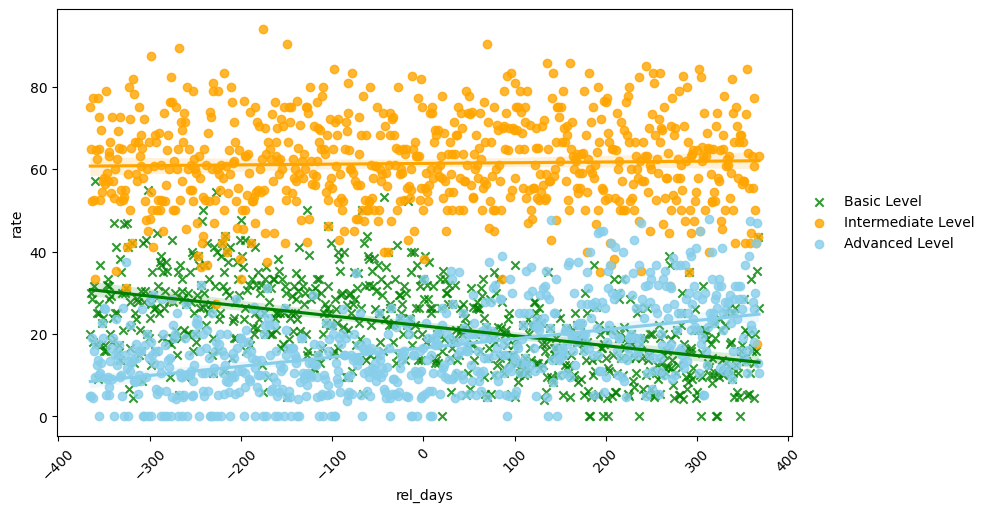

In [24]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)




#create scatterplot with regression line
sns.regplot(  data=m_chk_cnt_0
            , x="rel_days"
            , y="rate"
            , ci=99
            , marker="x"
            , color=".5"
            , scatter_kws={"color": "green"}
            , line_kws={"color": "green"}
            , label = 'Basic Level')

sns.regplot(  data=m_chk_cnt_1
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "orange"}
            , line_kws={"color": "orange"}
            , label = 'Intermediate Level')

sns.regplot(  data=m_chk_cnt_2
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "skyblue"}
            , line_kws={"color": "skyblue"}
            , label = 'Advanced Level')

# ax.scatter(m_chk_cnt_0.creationdate, m_chk_cnt_0.rate, # specify data
#         color = 'red',
#         label = 'Basic',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

# ax.scatter(m_chk_cnt_1.creationdate, m_chk_cnt_1.rate, # specify data
#         color = 'orange',
#         label = 'Intermediate',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 


# ax.scatter(m_chk_cnt_2.creationdate, m_chk_cnt_2.rate, # specify data
#         color = 'green',
#         label = 'Advanced',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

ax.legend(loc="center left", bbox_to_anchor=[1, 0.5], frameon=False)

# ax.axvline(major_xticks[25], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)


# ax.set_xticks(major_xticks)

plt.tight_layout()  
plt.xticks(rotation=45)
# plt.xscale('log');
plt.show();

In [25]:
m_chk_cnt_0[m_chk_cnt_0['rel_days'] ==1]

,creationdate,rel_days,o_result,rate
366,2022-12-01,1.0,0,28.571429


In [26]:
m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,creationdate,rel_days,o_result,rate


In [27]:
st_0 = st.Stats(m_chk_cnt_0['rel_days'].values, m_chk_cnt_0['rate'].values, 2, 0.95)
st_1 = st.Stats(m_chk_cnt_1['rel_days'].values, m_chk_cnt_1['rate'].values, 2, 0.95)
st_2 = st.Stats(m_chk_cnt_2['rel_days'].values, m_chk_cnt_2['rate'].values, 2, 0.95)

In [28]:
F_stat_0, p_value_0 = st_0.chow_test()
F_stat_1, p_value_1 = st_1.chow_test()
F_stat_2, p_value_2 = st_2.chow_test()

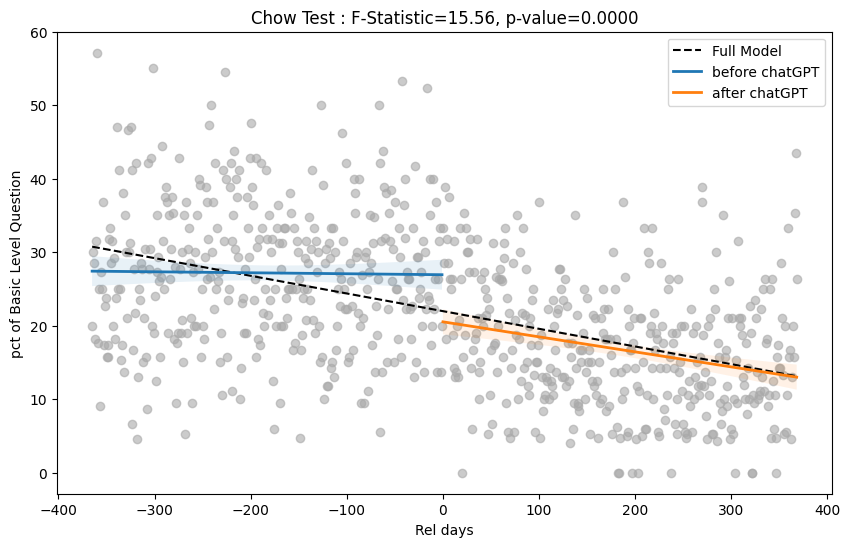

In [29]:
x_0 = m_chk_cnt_0['rel_days'].values
y_0 = m_chk_cnt_0['rate'].values

split_idx = np.argmax(np.where(x_0 <= 0))
x_0_1= x_0[:split_idx]
x_0_2= x_0[split_idx:]
# 시각화

plt.figure(figsize=(10, 6))
plt.scatter(x_0, y_0,  alpha=0.6, color='darkgray')
plt.plot(x_0, st_0.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_0_1, st_0.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)

plt.plot(x_0_2, st_0.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_0:.2f}, p-value={p_value_0:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Basic Level Question")
plt.show()


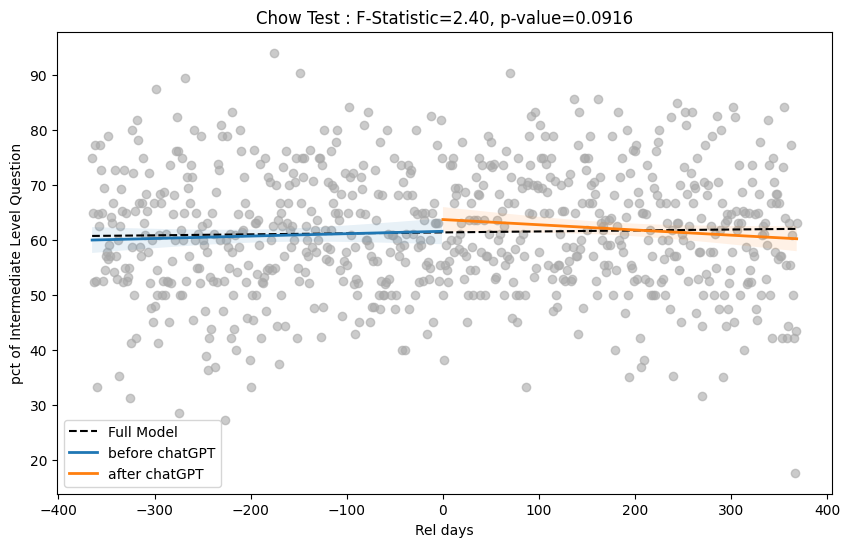

In [30]:
x_1 = m_chk_cnt_1['rel_days'].values
y_1 = m_chk_cnt_1['rate'].values

split_idx = np.argmax(np.where(x_1 <= 0))
x_1_1 = x_1[:split_idx]
x_1_2 = x_1[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_1, y_1,  alpha=0.6, color='darkgray')
plt.plot(x_1, st_1.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_1_1, st_1.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)

plt.plot(x_1_2, st_1.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_1:.2f}, p-value={p_value_1:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Intermediate Level Question")
plt.show()


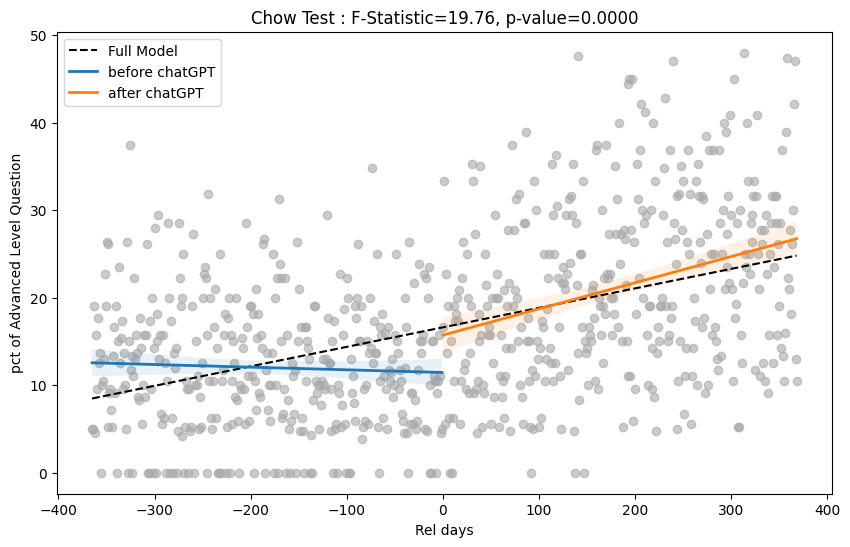

In [31]:
x_2 = m_chk_cnt_2['rel_days'].values
y_2 = m_chk_cnt_2['rate'].values

split_idx = np.argmax(np.where(x_2 <= 0))
x_2_1 = x_2[:split_idx]
x_2_2 = x_2[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_2, y_2,  alpha=0.6, color='darkgray')
plt.plot(x_2, st_2.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x_2_1, st_2.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)

plt.plot(x_2_2, st_2.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_2:.2f}, p-value={p_value_2:.4f}")
plt.xlabel("Rel days")
plt.ylabel("pct of Advanced Level Question")
plt.show()


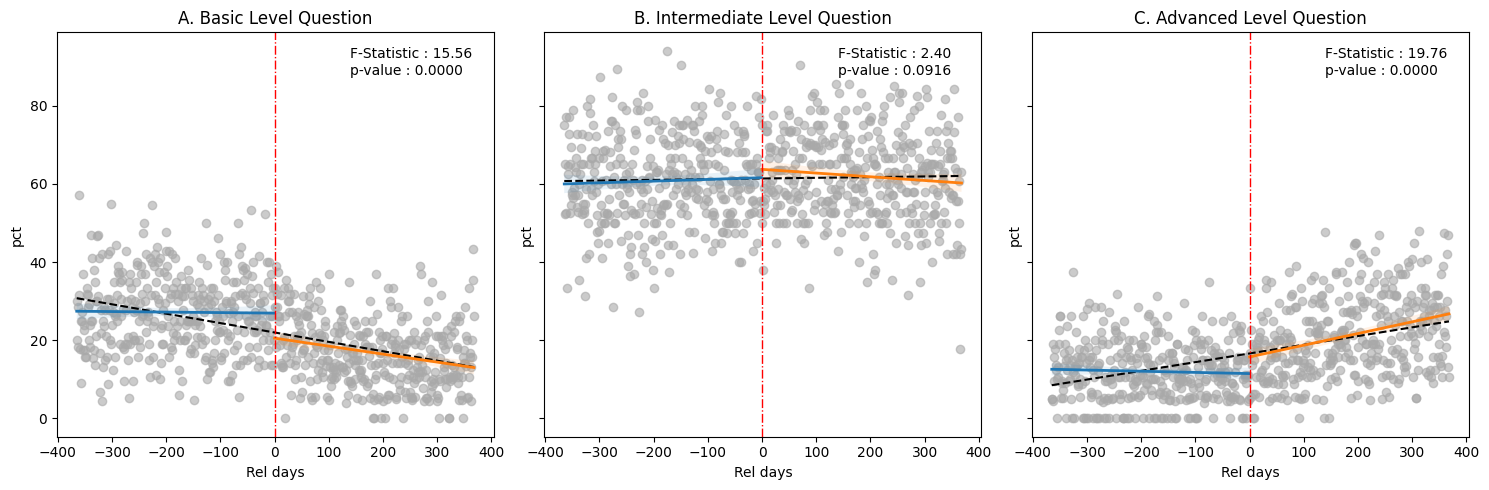

In [32]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (15, 5), sharey=sharey, sharex=sharex)


axs[0].scatter(x_0, y_0,  alpha=0.6, color='darkgray')
axs[0].plot(x_0, st_0.y_predict, label="Full Model", linestyle="--", color="black")  
axs[0].plot(x_0_1, st_0.y1_predict, label="before chatGPT", linewidth='2')
axs[0].fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)
axs[0].plot(x_0_2, st_0.y2_predict, label="after chatGPT", linewidth='2')
axs[0].fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].set_title(f"A. Basic Level Question")
axs[0].set_xlabel("Rel days")
axs[0].set_ylabel("pct")
axs[0].text(140, 88, s=f'F-Statistic : {F_stat_0:.2f}\np-value : {p_value_0:.4f}', fontsize = 10) #


axs[1].scatter(x_1, y_1,  alpha=0.6, color='darkgray')
axs[1].plot(x_1, st_1.y_predict, label="Full Model", linestyle="--", color="black")  
axs[1].plot(x_1_1, st_1.y1_predict, label="before chatGPT", linewidth='2')
axs[1].fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)
axs[1].plot(x_1_2, st_1.y2_predict, label="after chatGPT", linewidth='2')
axs[1].fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].set_title(f"B. Intermediate Level Question")
axs[1].set_xlabel("Rel days")
axs[1].set_ylabel("pct")
axs[1].grid(False)
axs[1].text(140, 88, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 10) #


axs[2].scatter(x_2, y_2,  alpha=0.6, color='darkgray')
axs[2].plot(x_2, st_2.y_predict, label="Full Model", linestyle="--", color="black")  
axs[2].plot(x_2_1, st_2.y1_predict, label="before chatGPT", linewidth='2')
axs[2].fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)
axs[2].plot(x_2_2, st_2.y2_predict, label="after chatGPT", linewidth='2')
axs[2].fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)
axs[2].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[2].set_title(f"C. Advanced Level Question")
axs[2].set_xlabel("Rel days")
axs[2].set_ylabel("pct")
axs[2].text(140, 88, s=f'F-Statistic : {F_stat_2:.2f}\np-value : {p_value_2:.4f}', fontsize = 10) #

fig.tight_layout()
plt.show();

In [35]:
fig.savefig("difficulty_level_chow_ver4.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화

In [34]:
with open(f'{conf.DATA_PATH}/data/m_chk_cnt_0_ver4.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_0, f)


with open(f'{conf.DATA_PATH}/data/m_chk_cnt_1_ver4.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_1, f)


with open(f'{conf.DATA_PATH}/data/m_chk_cnt_2_ver4.pkl', 'wb') as f:
    pickle.dump(m_chk_cnt_2, f)